In [13]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np

# open files
df_hdiy = pd.read_csv('../data/cleaned_hdi_py_data.csv')

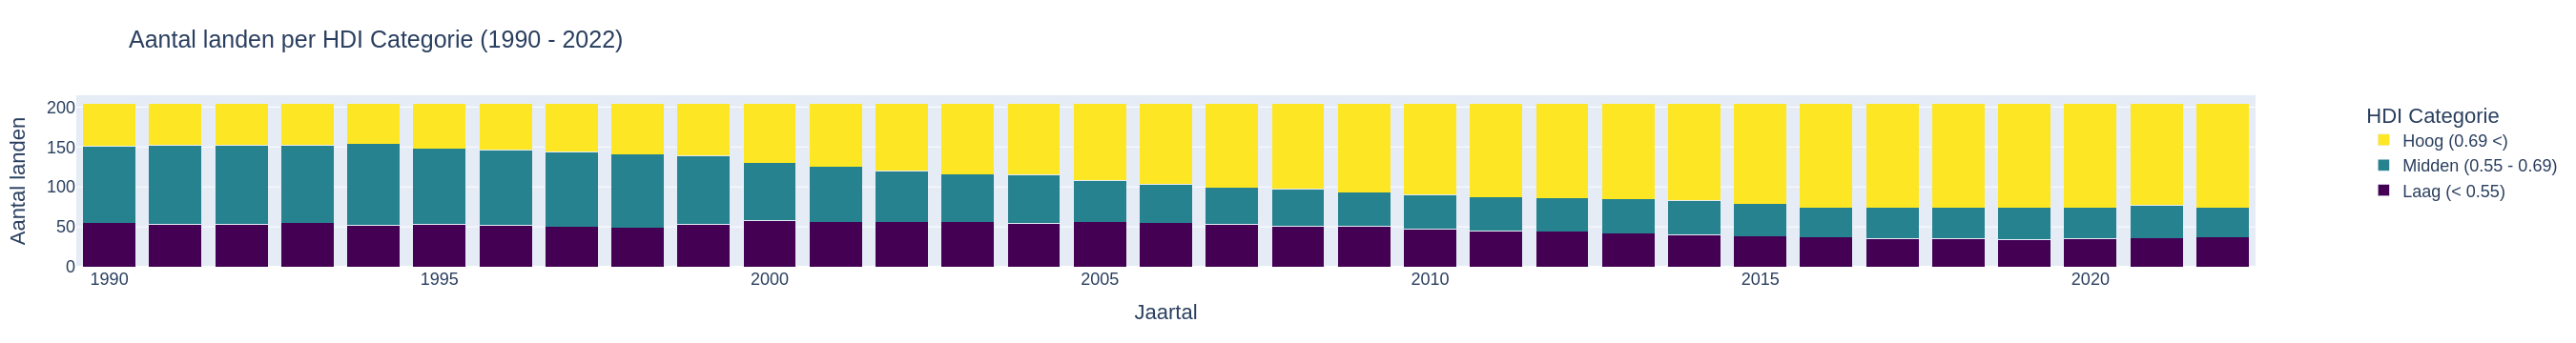

In [24]:
import pandas as pd
import plotly.graph_objects as go

# Assume df_hdiy is already defined and contains the necessary data

years = list(range(1990, 2023))
hdi_columns = [f'hdi_{year}' for year in years]
df_hdiyn = df_hdiy[['country'] + hdi_columns]

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Convert year to numeric
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0, 0.55, 0.69, 1.0]
labels = ['Laag (< 0.55)', 'Midden (0.55 - 0.69)', 'Hoog (0.69 <)']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

# Group by year and category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0).reset_index()

# Define the viridis colors in RGB format
viridis_colors_rgb = ['rgba(68, 1, 84, 1)',  'rgba(38, 130, 142, 1)',
    'rgba(253, 231, 37, 1)'
]

# Create the plot
fig = go.Figure()

# Add traces for each category with specified colors
for category, color in zip(labels, viridis_colors_rgb):
    fig.add_trace(go.Bar(
        x=df_grouped['year'],
        y=df_grouped[category],
        name=category,
        marker_color=color,
        hovertemplate='<b>Jaartal</b>: %{x}<br><b>Aantal landen</b>: %{y}<extra></extra>'
    ))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Aantal landen per HDI Categorie (1990 - 2022)',
    xaxis=dict(title='Jaartal'),
    yaxis=dict(title='Aantal landen'),
    legend=dict(title='HDI Categorie', x=1.05, y=1),
    font=dict(size=18),
    autosize=False
)

fig.show()
